In [2]:
import copy
from matplotlib import pyplot as pl
from matplotlib import animation as ani

In [3]:
w=[0,0] #weight vector
b=0 #bias
yita=0.5 #learning rate
data=[[(1,4),1],[(0.5,2),1],[(2,2.3), 1], [(1, 0.5), -
1], [(2, 1), -1],[(4,1),-1],[(3.5,4),1],[(3,2.2),-1]]
# data=[[(3, 3), 1], [(4, 3), 1], [(1, 1), -1]]
record=[]

In [4]:
def sign(vec):
    global w,b
    res = 0
    res=vec[1]*(w[0]*vec[0][0]+w[1]*vec[0][1]+b)
    if res>0: return 1
    else: return -1
    
    
def update(vec): 
    global w,b,record
    w[0]=w[0]+yita*vec[1]*vec[0][0]
    w[1]=w[1]+yita*vec[1]*vec[0][1]
    b=b+yita*vec[1]
    record.append([copy.copy(w),b])
    
def perceptron():
    count=1
    for ele in data:
        flag=sign(ele)
        #分类错误flag<0
        if not flag>0:
            count=1
            update(ele)
        else:
            count+=1
        ##所有都分类正确
        if count>=len(data):
            return 1 

In [5]:
perceptron()
print(record)

[[[0.5, 2.0], 0.5], [[0.0, 1.75], 0.0], [[-1.0, 1.25], -0.5]]


In [6]:
if __name__ == "__main__":
    while 1:
        if perceptron() > 0:
            break
    print(record)

[[[0.5, 2.0], 0.5], [[0.0, 1.75], 0.0], [[-1.0, 1.25], -0.5]]


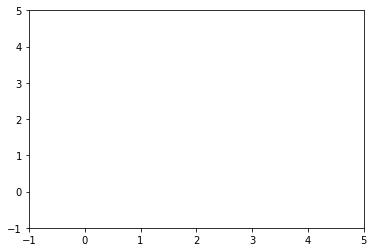

In [7]:
x1=[]
y1=[]
x2=[]
y2=[]
fig = pl.figure()
ax = pl.axes(xlim=(-1, 5), ylim=(-1, 5))
line,=ax.plot([],[],'g',lw=2)

In [8]:
#类别为正的红,负的蓝
def init():
    line.set_data([],[])
    for p in data:
        if p[1]>0:
            x1.append(p[0][0])

            y1.append(p[0][1])
        else:
            x2.append(p[0][0])
            y2.append(p[0][1])
    pl.plot(x1,y1,'or')
    pl.plot(x2,y2,'ob')
    return line,

def animate(i):
    global record,ax,line
    w=record[i][0]
    b=record[i][1]
    x1=-5
    y1=-(b+w[0]*x1)/w[1]
    x2=6
    y2=-(b+w[0]*x2)/w[1]
    line.set_data([x1,x2],[y1,y2])
    return line,

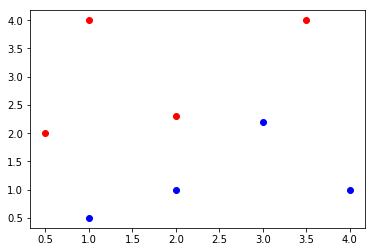

MovieWriter imagemagick unavailable. Trying to use pillow instead.


IndexError: list index out of range

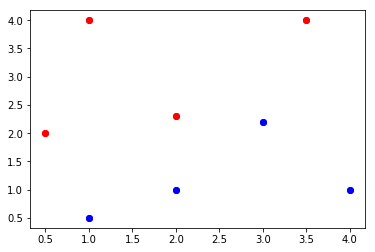

In [11]:
animat = ani.FuncAnimation(fig,animate(2),init_func=init,
                           frames=3,interval=1000,repeat=True,blit=True)
pl.show()
animat.save('perceptron.gif', fps=2,writer='imagemagick')


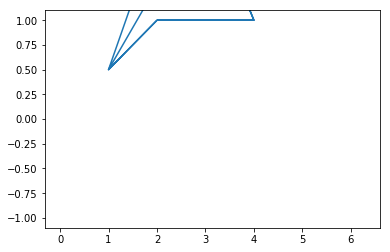

In [33]:
from matplotlib import animation
from matplotlib import pyplot as plt
import numpy as np
#动态图所需要的包
fig,ax = plt.subplots()#子图像
x = np.arange(0,2*np.pi,0.01)
line, = ax.plot(x,np.sin(x))
 
def animate(i):
    line.set_ydata(np.sin(x+i/10))#用来改变的y对应的值
    return line,
def init():
    line.set_data([x1,x2],[y1,y2])
    return line,
 
ani = animation.FuncAnimation(fig=fig,func=animate,init_func=init,interval=20000000)#动态作图的方法，func动态图函数，init_func初始化函数，interval指图像改变的时间间隔
plt.show()

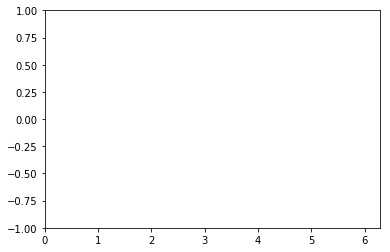

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'r-', animated=False)

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()


MovieWriter imagemagick unavailable. Trying to use pillow instead.


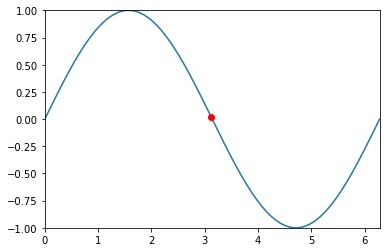

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import animation

"""
animation example 2
author: Kiterun
"""

fig, ax = plt.subplots()
x = np.linspace(0, 2*np.pi, 200)
y = np.sin(x)
l = ax.plot(x, y)
dot, = ax.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return l

def gen_dot():
    for i in np.linspace(0, 2*np.pi, 200):
        newdot = [i, np.sin(i)]
        yield newdot

def update_dot(newd):
    dot.set_data(newd[0], newd[1])
    return dot,

ani = animation.FuncAnimation(fig, update_dot, frames = gen_dot, interval = 100, init_func=init)
ani.save('sin_dot.gif', writer='imagemagick', fps=30)

plt.show()
